# MATH 795 - Data Science in Math Education

- Plan for the course
- Getting Jupyter / R / R-Studio
- Using Github
- Our Textbook.

## What is Data Science - via an example

What makes data science different from statistics:

- An emphasis on models and making predictions;
- Techniques built around their utility for large amounts of data; and
- Empiracle techniques rather than relying on theories and assumptions.

What do I mean?  

- A major defeciency of classical statistics (or inferential statistics) is that it relies on assumptions that the distribution fits a particular pattern, or covnerges to a particular pattern. The problem is that this is an assumption, and not one that is always easy to justify or observe.

### Testing and Training

If you have enough data, there is another way:  You can divide you data into Testing and Training sets. You use the training set to make a prediction, and then you use the testing set to validate (or reject) the prediction. If you do this over and over, you can get a sense of the extent to which your model is working; you can also use it to determine which set of parameters give your model the best fit. 



### Random Sampling your Data - Resampling

The other technique that becomes viable when you have plenty of data is random sampling your data, called **Resampling**.  **Bootstrapping** is a particular form of this where you build a dataset that is the same size as your original but sampling randomly from your data set with replacement. You can then use this new dataset to compute the test statistic you are interested in. You do this over and over and what you get is a sense of how much the test statistic varies in the samples taken from your population. 

Using resampling you can recreate the idea of Confidence Intervals and Hypothesis tests, but in a way that requires no assumptions about the underlying distribution, just that your datyaset represents a random and representative sample of it. 



# A First Example (which will start but not finish)

A common first example is to examine the Iris Dataset; a collection of measurements for three types of irises assembled by Fisher and published in the late 20s.

In [78]:
iris = read.csv("Datasets/iris.csv", header = FALSE, col.names=c("sepal_length", "sepal_width", "petal_length", "petal_width", "class"))
# header = True (default) is when the first row of the data contains the column names;
# if the header is False then col.names lets us rename the columns (these names were in a separate file)

head(iris)

,sepal_length,sepal_width,petal_length,petal_width,class
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa


In [79]:
library("tidyverse")

# our books uses a set of packages collectively known as "tidyverse"

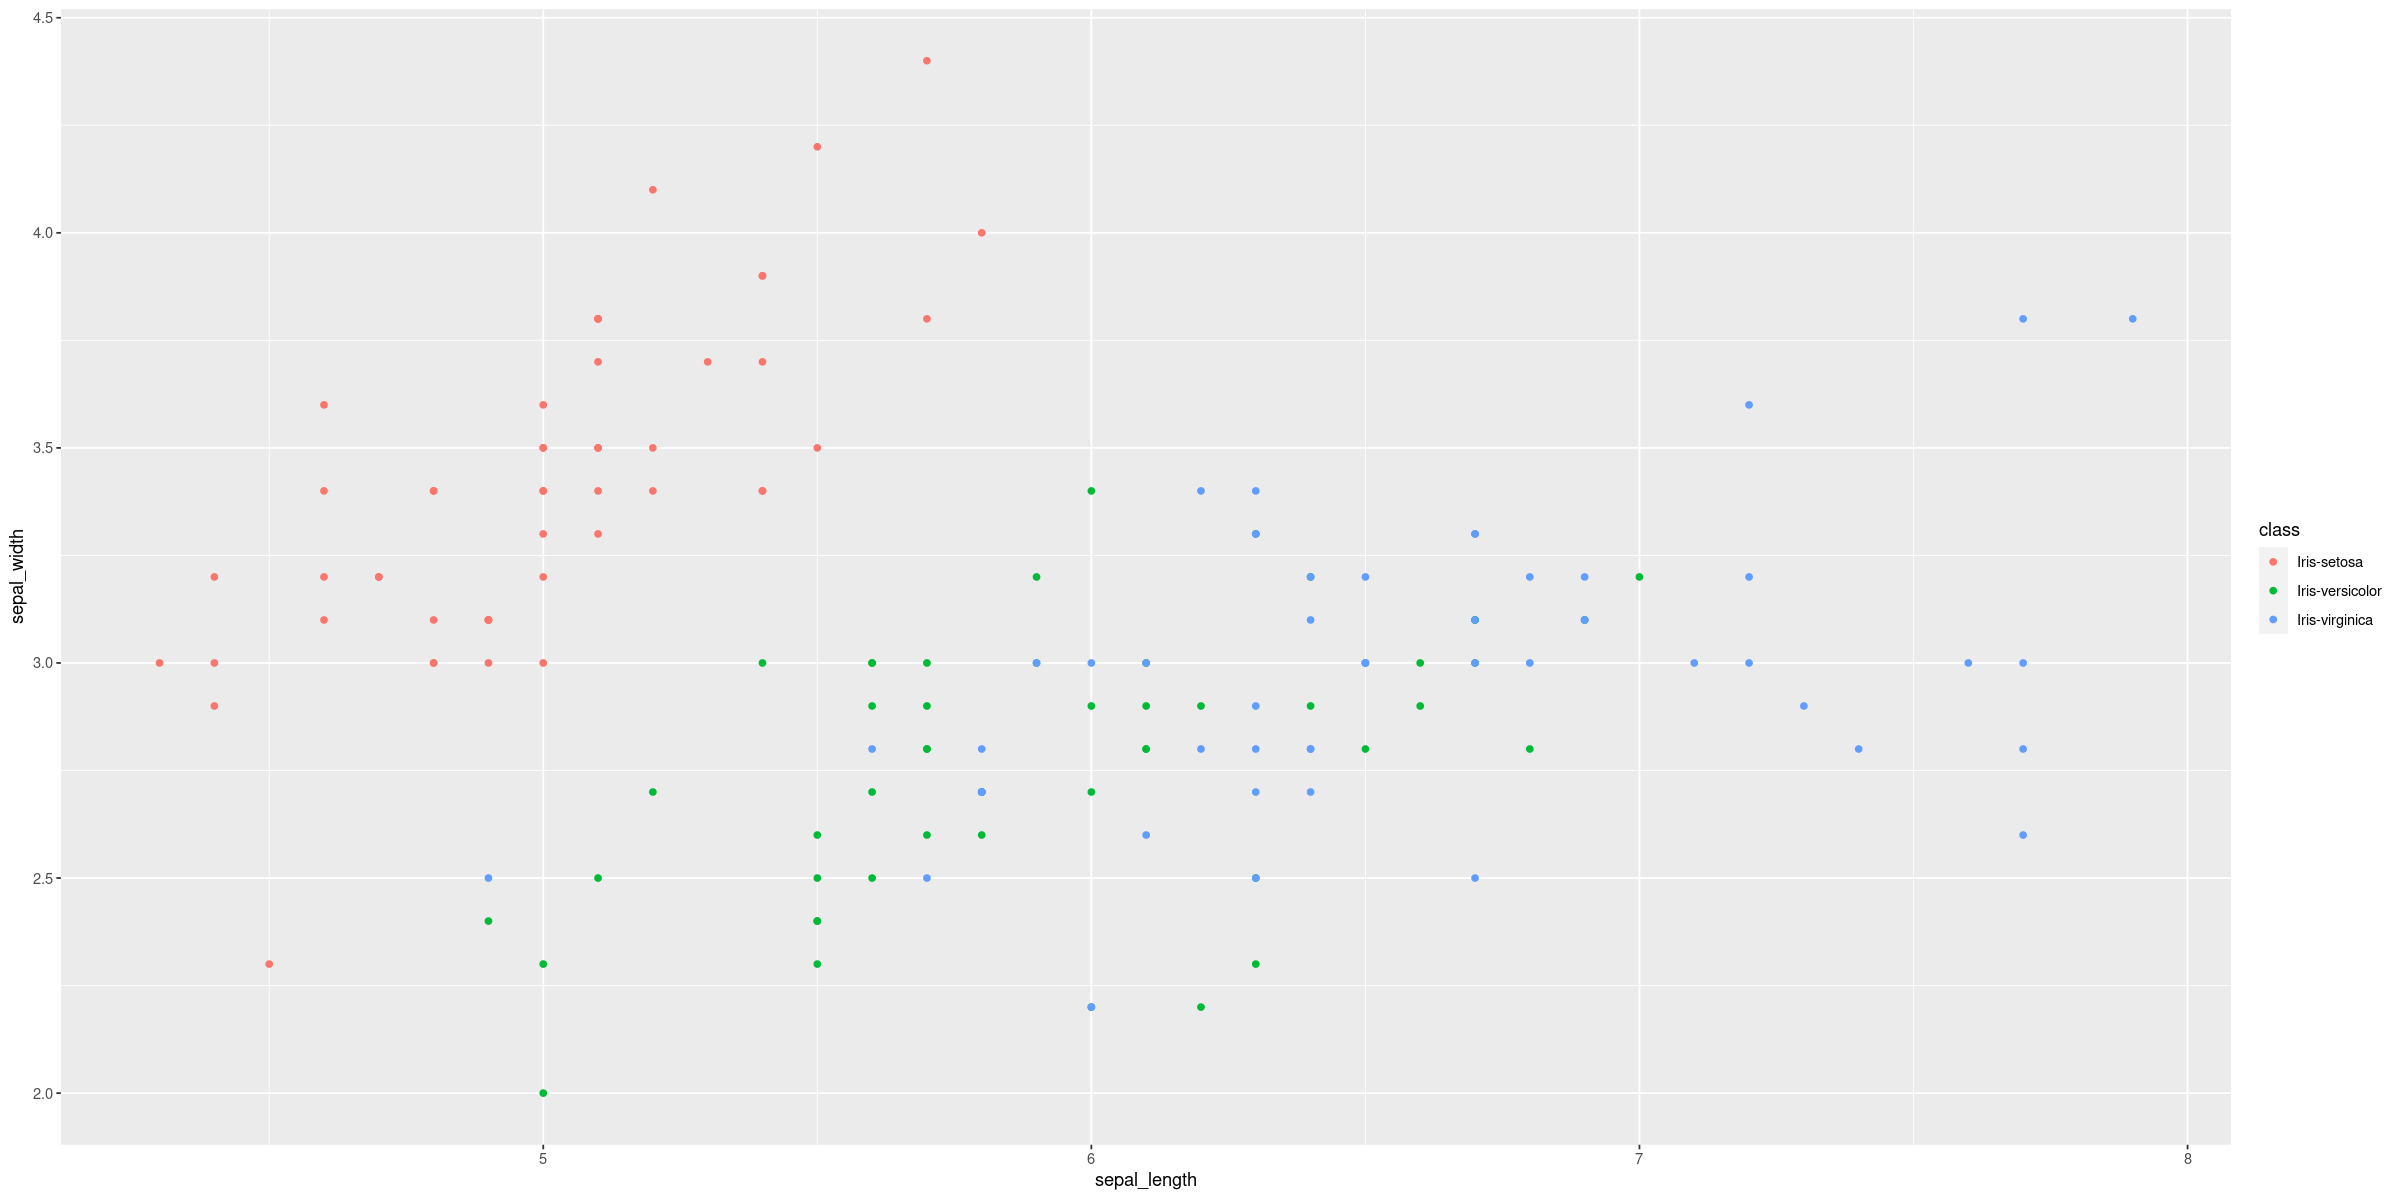

In [80]:
# One thing the tidy verse gives us is a concise grammar for generating graphics

ggplot(data = iris, aes(x=sepal_length, y=sepal_width, col=class)) + geom_point()

and now you see the task:  Can we classify the variety of iris using the 4 (or fewer) measurements of the flower dimensions.

We will stop there with this dataset because - It turns out that Fisher had some problematic points of view, and it is worth seeing if we can use a different dataset to do the same introductory task. I mention him so that you are aware of this work, and the dataset as it is one of the classic examples.

A much better alternative is the Penguin Dataset:  https://github.com/allisonhorst/palmerpenguins

In [81]:
penguins = read.csv("Datasets/penguins_lter.csv")
head(penguins)

,studyName,Sample.Number,Species,Region,Island,Stage,Individual.ID,Clutch.Completion,Date.Egg,Culmen.Length..mm.,Culmen.Depth..mm.,Flipper.Length..mm.,Body.Mass..g.,Sex,Delta.15.N..o.oo.,Delta.13.C..o.oo.,Comments
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>
1,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181,3750,MALE,NA,NA,Not enough blood for isotopes.
2,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186,3800,FEMALE,8.94956,-24.69454,
3,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195,3250,FEMALE,8.36821,-25.33302,
4,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NA,NA,NA,NA,,NA,NA,Adult not sampled.
5,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193,3450,FEMALE,8.76651,-25.32426,
6,PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.3,20.6,190,3650,MALE,8.66496,-25.29805,


Warning message:
“Removed 2 rows containing missing values (geom_point).”


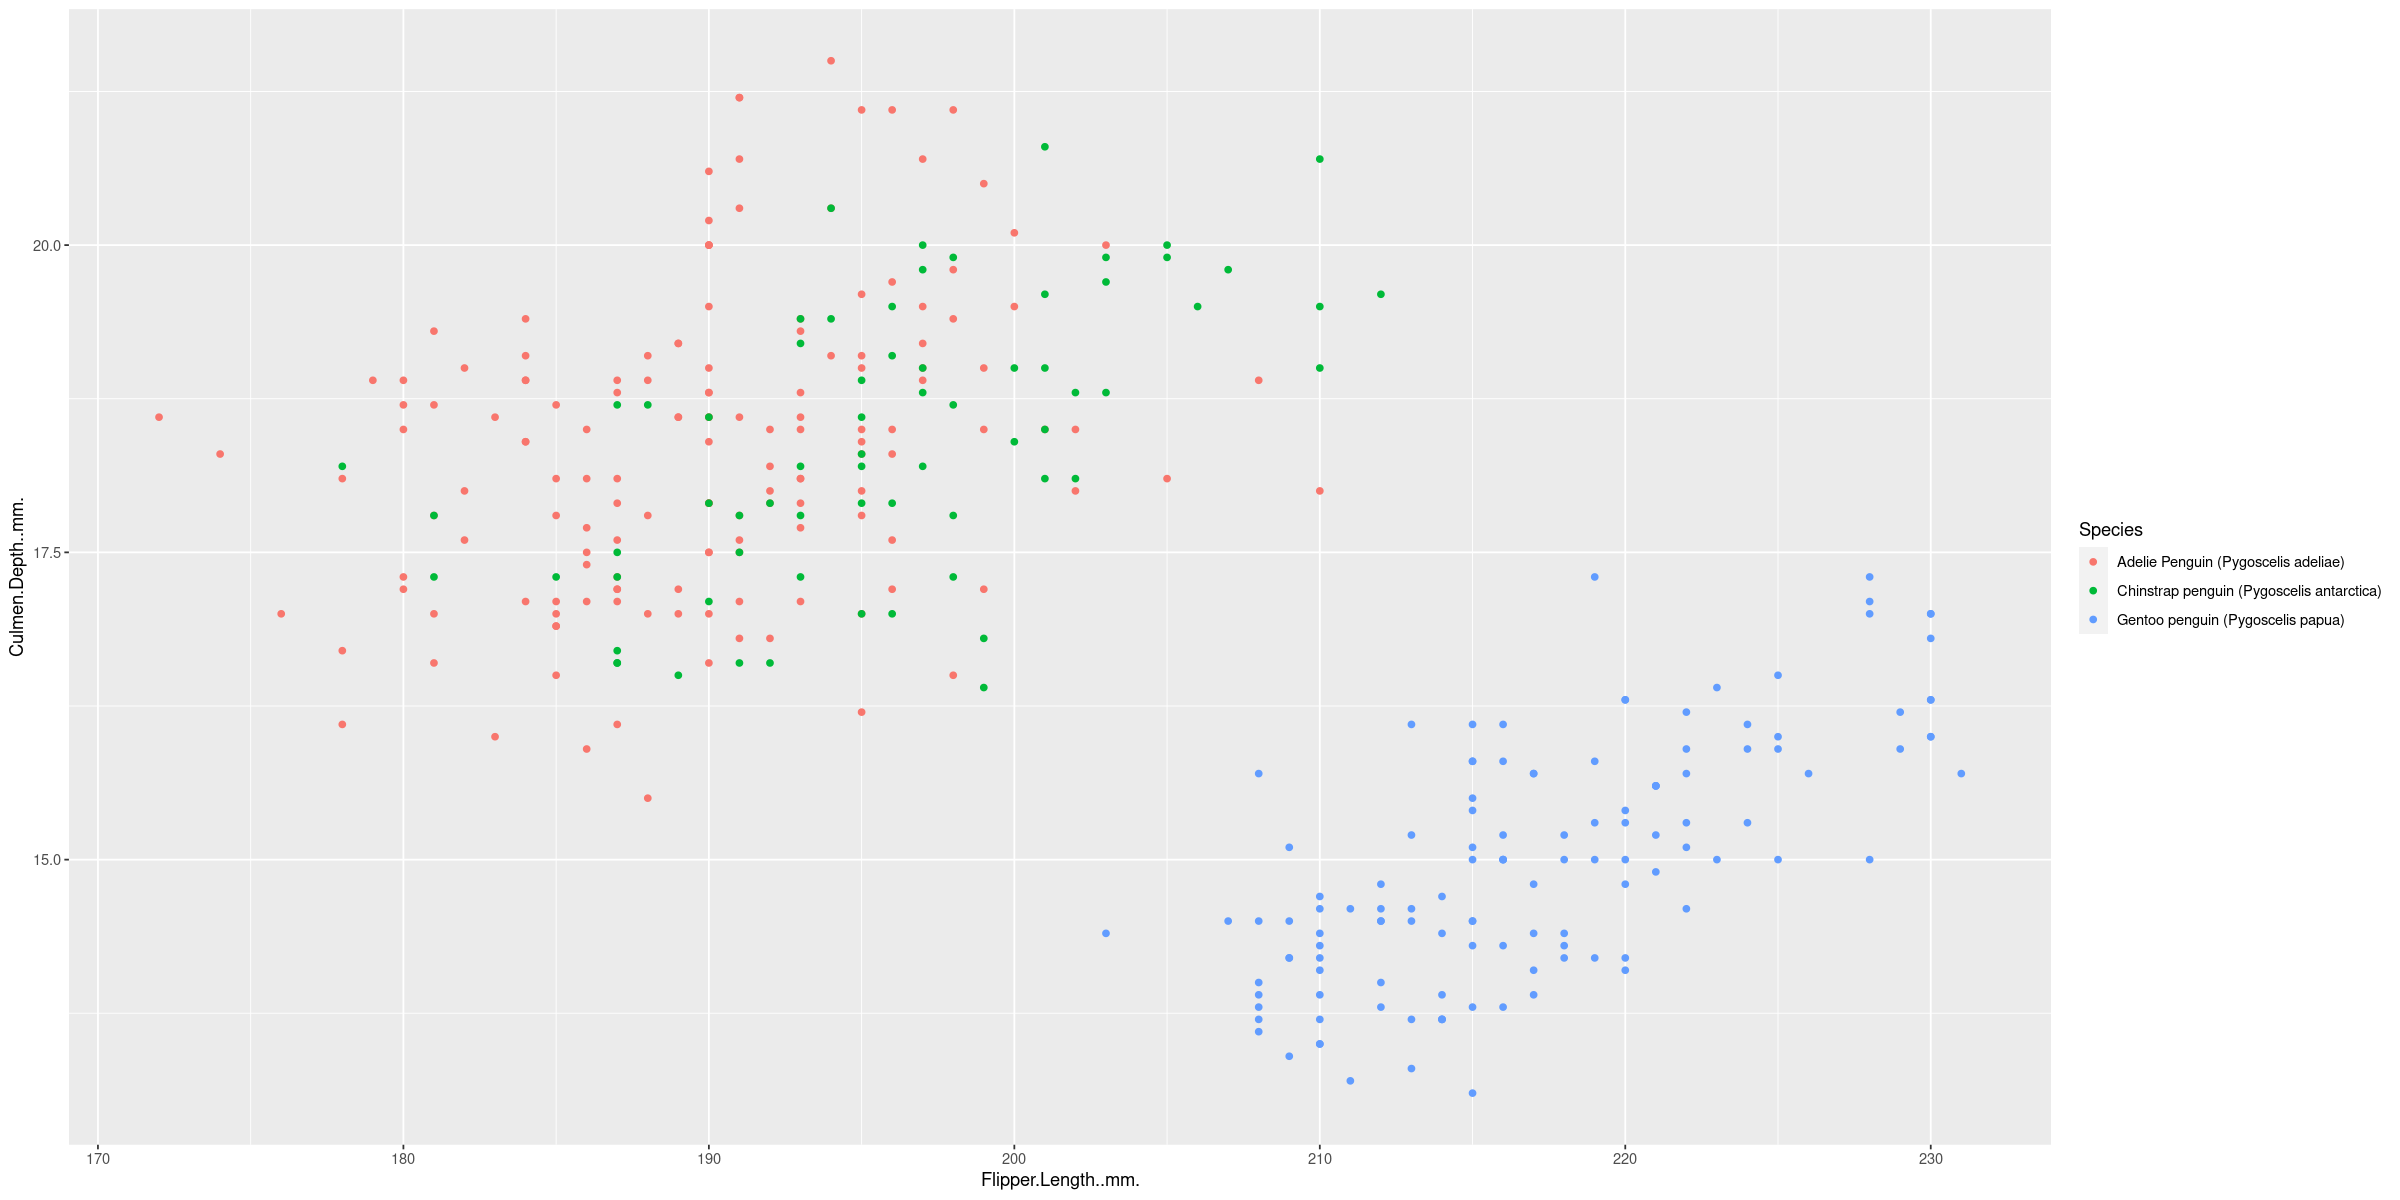

In [82]:
ggplot(data = penguins, aes(x=Flipper.Length..mm., y=Culmen.Depth..mm., col=Species))+geom_point()

In [83]:
library(repr)

Warning message:
“Removed 2 rows containing missing values (geom_point).”


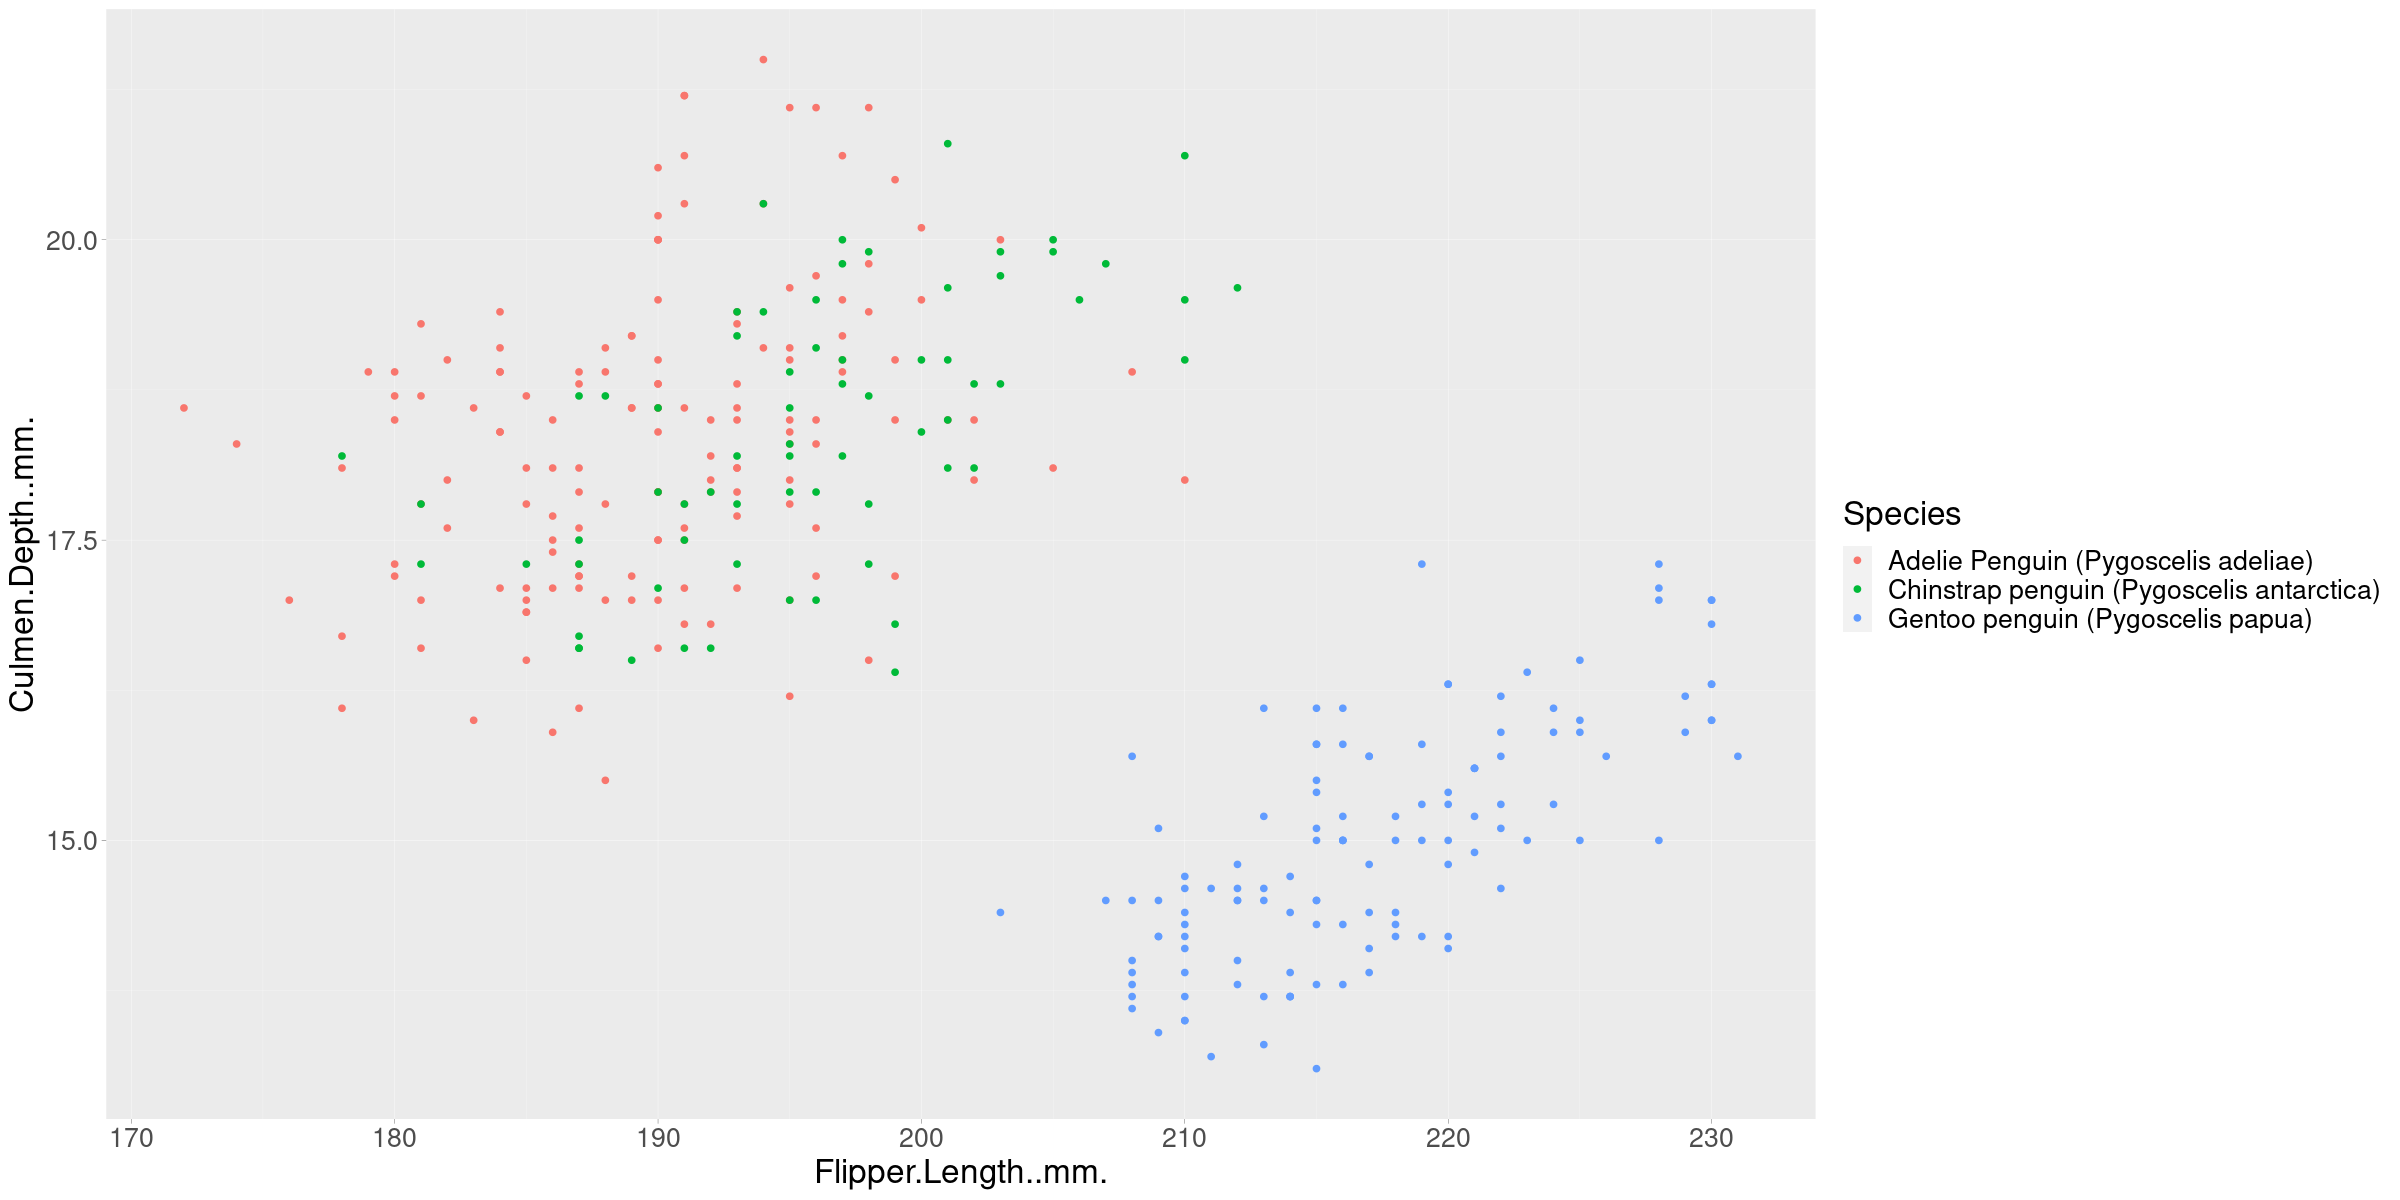

In [84]:
options(repr.plot.width = 20, repr.plot.height = 10)
ggplot(data = penguins, aes(x=Flipper.Length..mm., y=Culmen.Depth..mm., col=Species))+geom_point() +
  theme(text = element_text(size = 20), element_line(size = 0.1))

### K Nearest Neighbors

To illustrate the idea, what we will do is try to classify the species of Penguin using two (or more) of the numerical values in the data. The model we will use is called K-Nearest Neighbors. We fix an integer for $k$. The model then assigns a point in the space to the class for the majority of the k-nearest neighbors of that point are in. 

For example (see plot).

Of course if we use the whole dataset as the training set we will have no way to check on how well we did. So the trick, noting how many penguins we have data from, is to choose a random sample of them to use as a testing set. We will then train the model on the remaining values and then test its accuracy with the testing set:

In [85]:
# we need to remove the rows with missing data; and also pair the data down to just the values we will use
data = penguins[,c(3, 12,11)]
data = na.omit(data)
head(data)

,Species,Flipper.Length..mm.,Culmen.Depth..mm.
,<chr>,<int>,<dbl>
1,Adelie Penguin (Pygoscelis adeliae),181,18.7
2,Adelie Penguin (Pygoscelis adeliae),186,17.4
3,Adelie Penguin (Pygoscelis adeliae),195,18.0
5,Adelie Penguin (Pygoscelis adeliae),193,19.3
6,Adelie Penguin (Pygoscelis adeliae),190,20.6
7,Adelie Penguin (Pygoscelis adeliae),181,17.8


In [86]:
dt = sort(sample(nrow(data), nrow(data)*.8))
# Choose a random set of rows, without repeating, to use as the training set

train=data[dt,]
test=data[-dt,]

In [87]:
# we need to mark the columns we are going to use:
head(train)

,Species,Flipper.Length..mm.,Culmen.Depth..mm.
,<chr>,<int>,<dbl>
1,Adelie Penguin (Pygoscelis adeliae),181,18.7
2,Adelie Penguin (Pygoscelis adeliae),186,17.4
3,Adelie Penguin (Pygoscelis adeliae),195,18.0
5,Adelie Penguin (Pygoscelis adeliae),193,19.3
6,Adelie Penguin (Pygoscelis adeliae),190,20.6
7,Adelie Penguin (Pygoscelis adeliae),181,17.8


In [88]:
library(class)
# The class library contains a suite of classification algorithms

In [89]:
pr <- knn(train[,-1],test[,-1],cl=train[,1],k=1)

In [90]:
pr

[1] Adelie Penguin (Pygoscelis adeliae)      
 [2] Chinstrap penguin (Pygoscelis antarctica)
 [3] Adelie Penguin (Pygoscelis adeliae)      
 [4] Chinstrap penguin (Pygoscelis antarctica)
 [5] Adelie Penguin (Pygoscelis adeliae)      
 [6] Adelie Penguin (Pygoscelis adeliae)      
 [7] Adelie Penguin (Pygoscelis adeliae)      
 [8] Adelie Penguin (Pygoscelis adeliae)      
 [9] Adelie Penguin (Pygoscelis adeliae)      
[10] Chinstrap penguin (Pygoscelis antarctica)
[11] Adelie Penguin (Pygoscelis adeliae)      
[12] Adelie Penguin (Pygoscelis adeliae)      
[13] Adelie Penguin (Pygoscelis adeliae)      
[14] Chinstrap penguin (Pygoscelis antarctica)
[15] Adelie Penguin (Pygoscelis adeliae)      
[16] Chinstrap penguin (Pygoscelis antarctica)
[17] Adelie Penguin (Pygoscelis adeliae)      
[18] Adelie Penguin (Pygoscelis adeliae)      
[19] Chinstrap penguin (Pygoscelis antarctica)
[20] Adelie Penguin (Pygoscelis adeliae)      
[21] Adelie Penguin (Pygoscelis adeliae)      
[22] Adelie Penguin (Pygoscelis adeliae)      
[23] Chinstrap penguin (Pygoscelis antarctica)
[24] Adelie Penguin (Pygoscelis adeliae)      
[25] Adelie Penguin (Pygoscelis adeliae)      
[26] Adelie Penguin (Pygoscelis adeliae)      
[27] Adelie Penguin (Pygoscelis adeliae)      
[28] Adelie Penguin (Pygoscelis adeliae)      
[29] Adelie Penguin (Pygoscelis adeliae)      
[30] Adelie Penguin (Pygoscelis adeliae)      
[31] Adelie Penguin (Pygoscelis adeliae)      
[32] Adelie Penguin (Pygoscelis adeliae)      
[33] Chinstrap penguin (Pygoscelis antarctica)
[34] Adelie Penguin (Pygoscelis adeliae)      
[35] Adelie Penguin (Pygoscelis adeliae)      
[36] Chinstrap penguin (Pygoscelis antarctica)
[37] Adelie Penguin (Pygoscelis adeliae)      
[38] Chinstrap penguin (Pygoscelis antarctica)
[39] Adelie Penguin (Pygoscelis adeliae)      
[40] Chinstrap penguin (Pygoscelis antarctica)
[41] Adelie Penguin (Pygoscelis adeliae)      
[42] Adelie Penguin (Pygoscelis adeliae)      
[43] Gentoo penguin (Pygoscelis papua)        
[44] Gentoo penguin (Pygoscelis papua)        
[45] Gentoo penguin (Pygoscelis papua)        
[46] Gentoo penguin (Pygoscelis papua)        
[47] Gentoo penguin (Pygoscelis papua)        
[48] Gentoo penguin (Pygoscelis papua)        
[49] Gentoo penguin (Pygoscelis papua)        
[50] Gentoo penguin (Pygoscelis papua)        
[51] Gentoo penguin (Pygoscelis papua)        
[52] Gentoo penguin (Pygoscelis papua)        
[53] Gentoo penguin (Pygoscelis papua)        
[54] Gentoo penguin (Pygoscelis papua)        
[55] Gentoo penguin (Pygoscelis papua)        
[56] Gentoo penguin (Pygoscelis papua)        
[57] Gentoo penguin (Pygoscelis papua)        
[58] Gentoo penguin (Pygoscelis papua)        
[59] Gentoo penguin (Pygoscelis papua)        
[60] Gentoo penguin (Pygoscelis papua)        
[61] Gentoo penguin (Pygoscelis papua)        
[62] Gentoo penguin (Pygoscelis papua)        
[63] Gentoo penguin (Pygoscelis papua)        
[64] Gentoo penguin (Pygoscelis papua)        
[65] Gentoo penguin (Pygoscelis papua)        
[66] Gentoo penguin (Pygoscelis papua)        
[67] Gentoo penguin (Pygoscelis papua)        
[68] Gentoo penguin (Pygoscelis papua)        
[69] Gentoo penguin (Pygoscelis papua)        
3 Levels: Adelie Penguin (Pygoscelis adeliae) ...

How should we measure how accurate it is?



In [91]:
#create confusion matrix
tab <- table(pr, test[,1])
tab

                                           
pr                                          Adelie Penguin (Pygoscelis adeliae)
  Adelie Penguin (Pygoscelis adeliae)                                        20
  Chinstrap penguin (Pygoscelis antarctica)                                   7
  Gentoo penguin (Pygoscelis papua)                                           0
                                           
pr                                          Chinstrap penguin (Pygoscelis antarctica)
  Adelie Penguin (Pygoscelis adeliae)                                              11
  Chinstrap penguin (Pygoscelis antarctica)                                         4
  Gentoo penguin (Pygoscelis papua)                                                 0
                                           
pr                                          Gentoo penguin (Pygoscelis papua)
  Adelie Penguin (Pygoscelis adeliae)                                       0
  Chinstrap penguin (Pygoscelis antarctica)     

# Resampling

In [100]:
gentoo = penguins[penguins[,3]=='Gentoo penguin (Pygoscelis papua)',]
gentoo_flipper = na.omit(gentoo[,12])
# Note I had to add an na.omit

length(gentoo_flipper)

[1] 123

In [102]:
# Let's bootstrap this dataset a bunch of times and compute the mean each time:

data = c()
for (i in 1:50) { 
  temp = sample(gentoo_flipper, 123, replace = TRUE)
  data = c(data, mean(temp))
}

data

[1] 217.3984 217.0894 217.6179 218.1220 217.2114 217.8862 216.2276 217.2195
 [9] 217.1463 217.9919 217.2846 217.5854 217.7967 217.2033 217.3902 217.4065
[17] 217.3902 217.2195 218.1789 217.0000 217.0976 218.0488 217.3415 217.1138
[25] 217.0732 216.5528 216.9268 217.0407 217.9593 217.3577 217.4797 217.3089
[33] 217.3496 216.9756 217.2927 216.9268 216.7480 217.1301 217.0813 217.1707
[41] 217.0569 218.0244 218.4065 216.7073 217.2114 216.6911 217.1463 217.8537
[49] 216.3252 217.1382

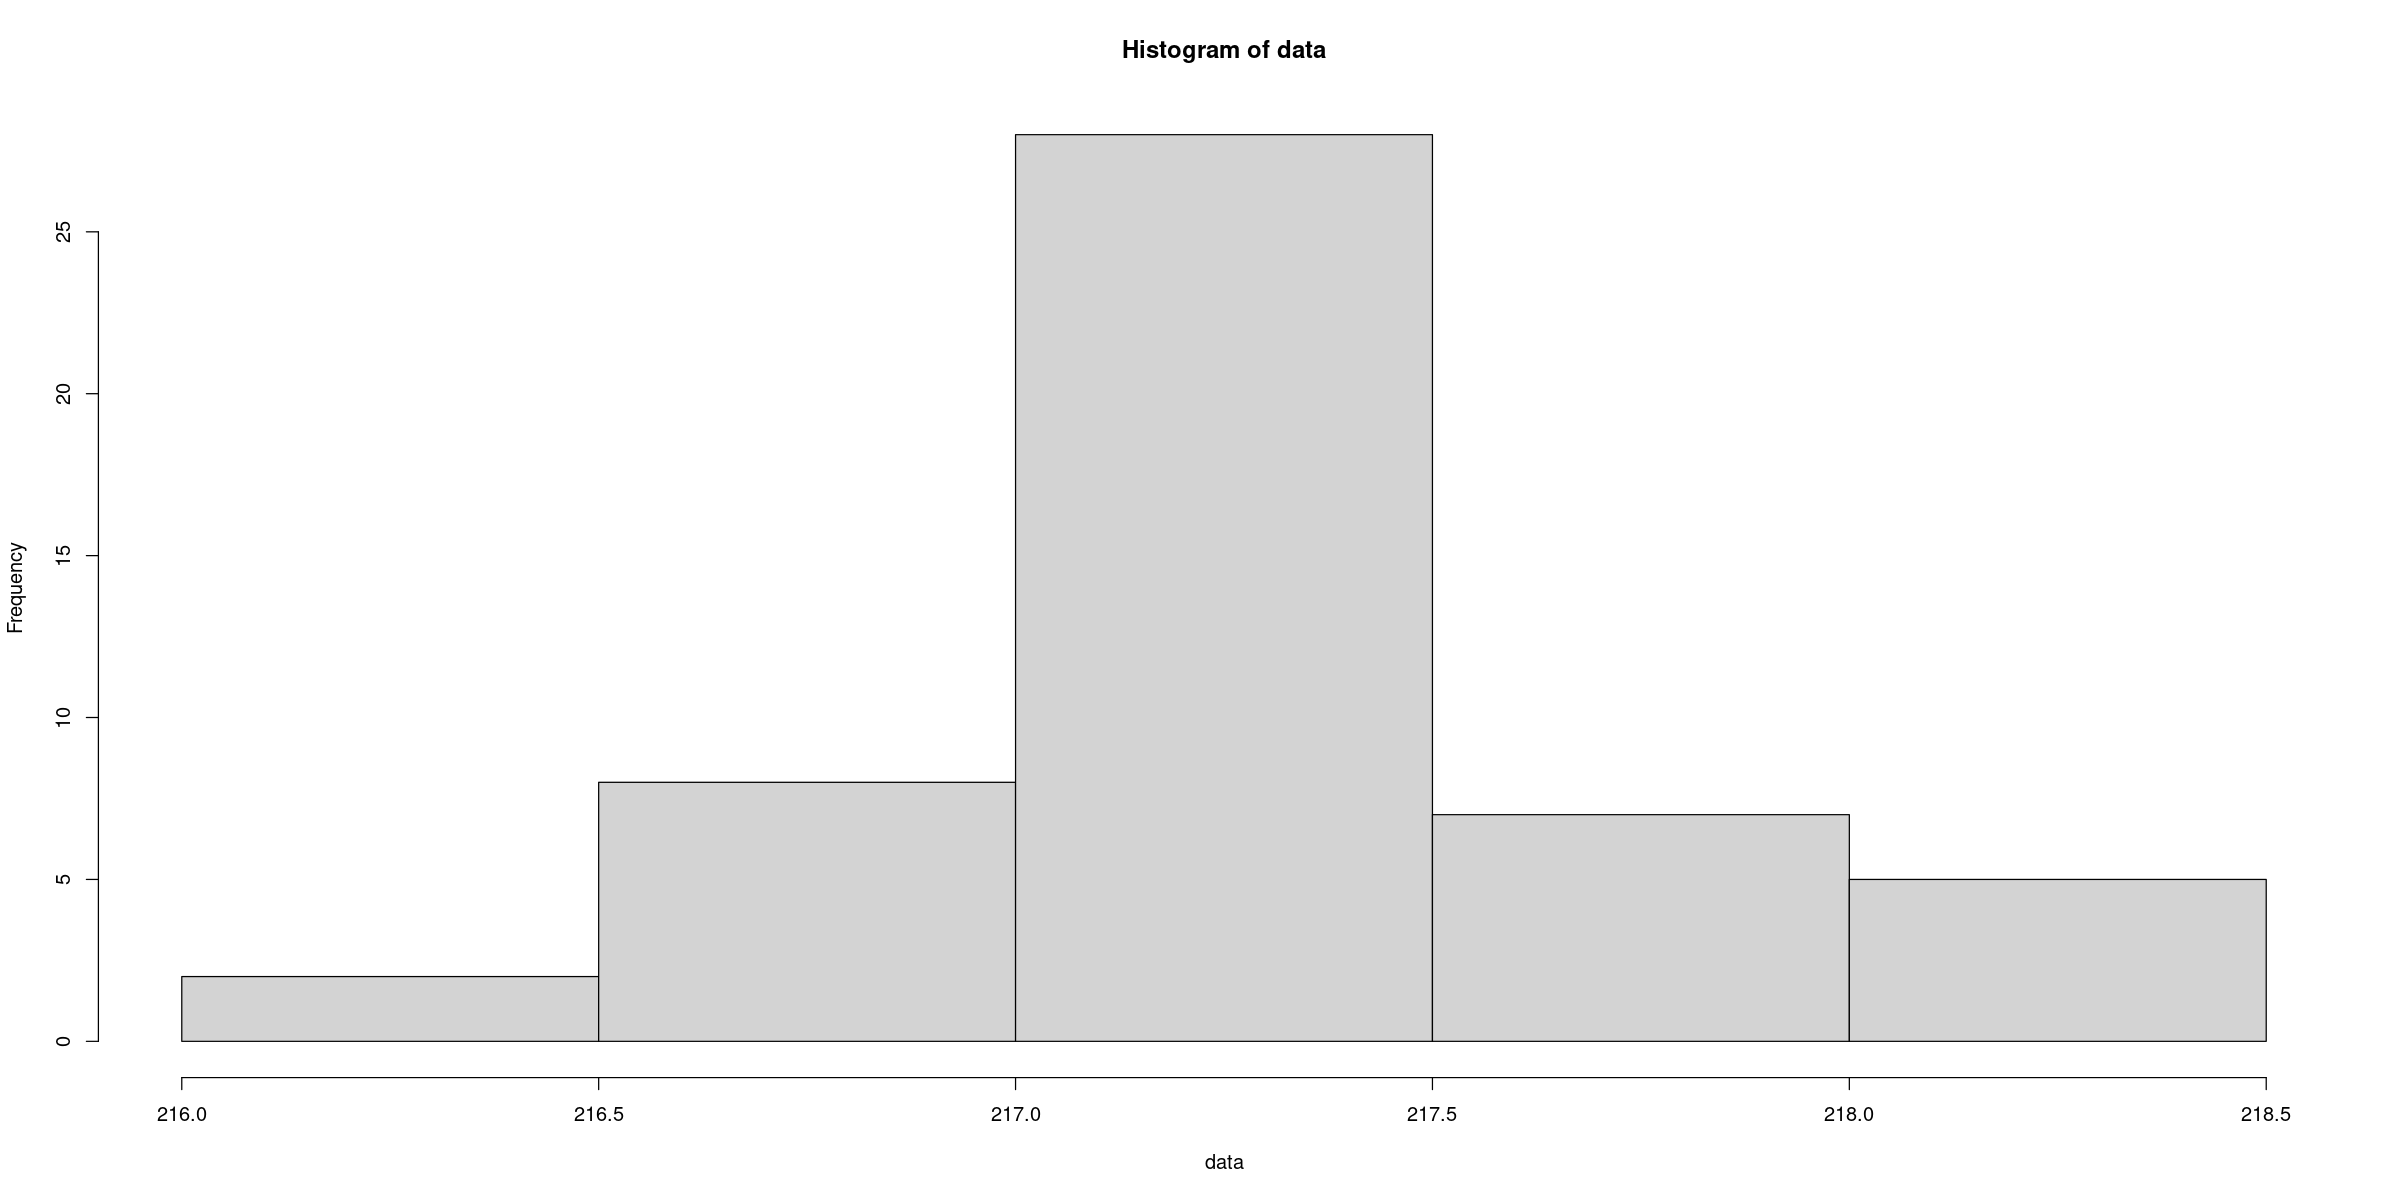

In [104]:
hist(data)

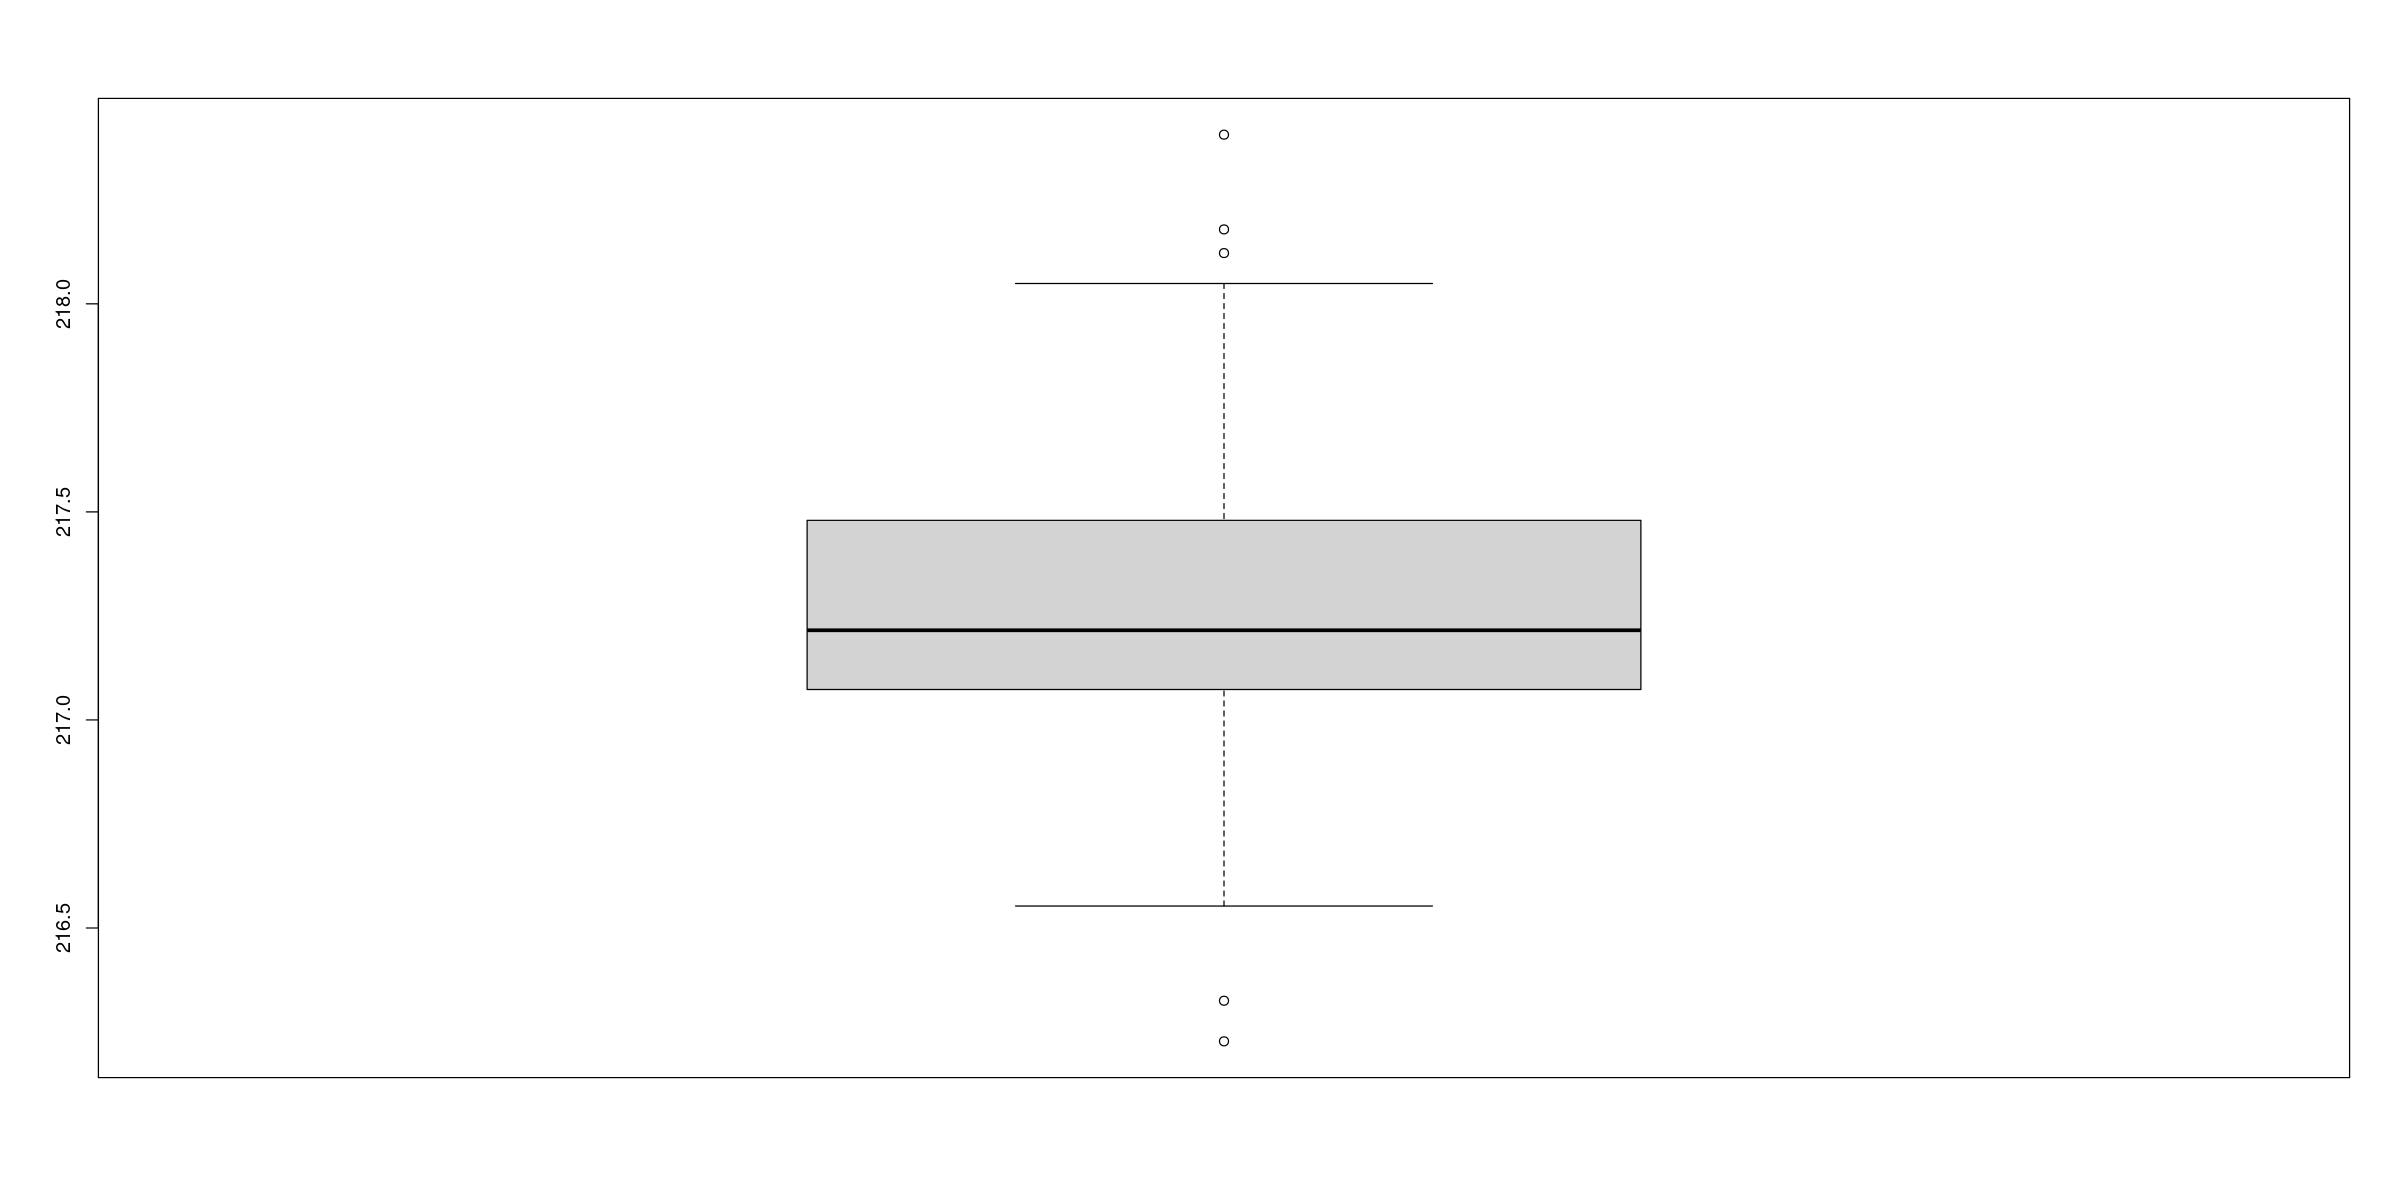

In [105]:
boxplot(data)